# Learning Problem

## Learning from Data

**learning from Data** can be  seen as learning a function or a probability distribution. 

1. From a probabilistic point of view it is our goal to learn a joint probability distribution $P$ that explains our data. With the knowledge of $P$ it would be possible to predict based on observations made: 

$$P(y|x) = \frac{P(x,y)}{P(x)} , P(x) \neq 0 , x \in X, y \in Y$$

2. On the other side the problem could be seen as a numeric optimization problem. Then we are searching for a function $f:X \to Y$ with $f(x) = y$ that explains the data.  

![Learning from Data](./learning-from-data.png)


Both the probability distribution P and the function f are unknown. But there is a chance to learn $P$ or $f$ based on data.

We will use both views in the rest of the lecture, but with strong focus on the numeric optimization. 

## Mathematical Formulation

When we look at machine learning, our goal is to learn a pattern from **data**. The pattern explains our data. Data means that we have a collection of data points. Each data point consists of independent and dependent variables. We call them **features** and **labels**. Sometimes called input and output. 

Let X and Y be vector spaces. A data point $(x,y)$ is an element of the product space $X \times Y$. 

Let $\theta \in R^n$ be a parameter. We are looking for a **hypothesis** that explains the data well. Our hypothesis is a parameterized function, that maps a feature vector from feature space $X$ onto a label vector in $Y$.

$$h_{\theta}: X \rightarrow Y: x \mapsto h_{\theta}(x) = \hat{y}$$

The set of all hypothesis build the hypothesis space. We call that space our **model**. Finding a good model implies domain knowledge. 

Our goal is to learn $\theta$ so, that for all data points $(x,y)$ the hypothesis $h_{\theta}(x) = \hat{y} \thickapprox y$ fits well. 

**Learning** is the process of finding a good hypothesis inside the hypothesis space.

To be able to evaluate our learning success we need a **loss** function $𝐿(𝑦,ℎ_{𝜃}(𝑥))$ that measures the  error for each data point.

Lets have a look at some typical loss functions:

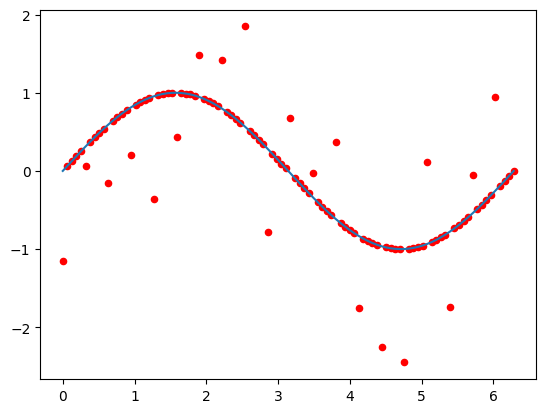

In [27]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(0,2*np.pi,100)
y = np.sin(X)
y_pred = np.copy(y) 
y_pred[::5] += 3 * (0.5 - np.random.rand(20))

fig, ax = plt.subplots()
ax.plot(X,y)
ax.scatter(X,y_pred, s=20, c="red")

plt.show()

In [28]:
def zero_one_loss(y, y_pred): 
    return np.where(y == y_pred,0,1) 

def l1_loss(y, y_pred):
    return np.abs(y - y_pred)

def l2_loss(y,y_pred):
    return np.square(y-y_pred)

In [50]:
print(zero_one_loss(y, y_pred).sum())
print(l1_loss(y, y_pred).sum())
print(l2_loss(y, y_pred).sum())

print(zero_one_loss(y, y_pred).mean())
print(l1_loss(y, y_pred).mean())
print(l2_loss(y, y_pred).mean())

20
17.5080378961405
17.675739920024025
0.2
0.175080378961405
0.17675739920024025


Now we have the tree basic ingredients of machine learning: **data**, **model**, **loss**

## Empirical Risk Minimization

Assume we know the joint probability distribution $P(X,Y)$ on $(X,Y)$. With this in mind the hypothesis $h$ could be seen as a random variable on $X \rightarrow Y$, and also the loss function $𝐿(y,h)$ is a random variable. Now we can compute the **statistical risk** as the expected value of the loss:

$$ R = \int_{} L(y,h)dP $$

**In reality we do not know P.** 

But if we have enough data points, we can approximate the statistical risk with the **empirical risk** acording to the law of large numbers:

$$ER = \frac{1}{m} \sum_{i=1}^{m} L(y^{(i)},h_{\theta}(x^{(i)}))$$

This leads to a minimization problem:

$$\hat{h} = \arg \min_{\theta} ER $$

If $L$ is differentiable we can use **gradient descent** to find a local minimum.